In [1]:
# Camila Losada - 18/11/2024

## Example on how to use NeuronData structure to analize individual neurons

In [2]:
# Import libraries
from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.trials import select_trials
from ephysvibe.task import task_constants
from ephysvibe.dataviz import plot_raster
import numpy as np
from matplotlib import pyplot as plt

import platform
import glob

In [3]:
if platform.system() == 'Linux':
    basepath = '/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure'
elif platform.system() == 'Windows':
    basepath = '//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure'

In [4]:
area='lip'
subpath = f'/session_struct/{area}/neurons'
path_list = glob.glob(f'{basepath}{subpath}/*')
path_list

['//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/lip/neurons\\2022-12-01_10-23-18_Riesling_lip_e1_r1_good1_neu.h5',
 '//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/lip/neurons\\2022-12-01_10-23-18_Riesling_lip_e1_r1_good2_neu.h5',
 '//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/lip/neurons\\2022-12-01_10-23-18_Riesling_lip_e1_r1_mua1_neu.h5',
 '//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/lip/neurons\\2022-12-01_10-23-18_Riesling_lip_e1_r1_good3_neu.h5',
 '//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/lip/neurons\\2022-12-01_10-23-18_Riesling_lip_e1_r1_good4_neu.h5',
 '//envau_cifs.intlocal.univ-amu.fr/work/invibe/USERS/IBOS/data/Riesling/TSCM/Ope

In [5]:
filepath = "/2023-02-24_10-43-44_Riesling_lip_e1_r1_good1_neu.h5" 
neu = NeuronData.from_python_hdf5(f'{basepath}{subpath}{filepath}') # read neuron data

In [6]:
# General information about the neuron
print(f'subject: {neu.subject}')
print(f'area: {neu.area}')
print(f'date_time: {neu.date_time}')
print(f'cluster_id: {neu.cluster_id}')
print(f'cluster_group: {neu.cluster_group}')
print(f'cluster_number: {neu.cluster_number}')
print(f'cluster_ch: {neu.cluster_ch}')
print(f'cluster_depth: {neu.cluster_depth}')

subject: Riesling
area: lip
date_time: 2023-02-24_10-43-44
cluster_id: 0
cluster_group: good
cluster_number: 1
cluster_ch: 12
cluster_depth: 650.0


In [7]:
neu.get_neuron_id() # function that generates the id of the neuron

'2023-02-24_10-43-44_Riesling_lip_e1_r1_good1'

In [8]:
# Behavioural information
print(f'block: {neu.block}')
mask_b1 = neu.block==1 # DMTS
mask_b2 = neu.block==2 # Saccade
print(f'Number of trials: {len(neu.block)}')
print(f'Number of trials in block 1: {np.sum(mask_b1)}')
print(f'Number of trials in block 2: {np.sum(mask_b2)}')
## Check number of correct trials (error = 0)
mask_err0 = neu.trial_error==0
print(f'Number of correct trials: {np.sum(mask_err0)}')
print(f'Number of correct trials in block 1: {np.sum(np.logical_and(mask_err0,mask_b1))}')
print(f'Number of correct trials in block 2: {np.sum(np.logical_and(mask_err0,mask_b2))}')

block: [2. 2. 2. ... 1. 1. 1.]
Number of trials: 1100
Number of trials in block 1: 1000
Number of trials in block 2: 100
Number of correct trials: 518
Number of correct trials in block 1: 438
Number of correct trials in block 2: 80


In [9]:
ntr = 5
## Block 2: saccade
print(f'possible samples: {np.unique(neu.sample_id[mask_b2])}')
print(f'possible sample location: {np.unique(neu.pos_code[mask_b2])}')
print(f'\ninformation about the first {ntr} trials:')
print(f'sample location {neu.pos_code[mask_b2].shape}: {neu.pos_code[mask_b2][:ntr]}')
print(f'events code {neu.code_numbers[mask_b2].shape}: \n{neu.code_numbers[mask_b2][:ntr]}')
print(f'events time {neu.code_samples[mask_b2].shape}: \n{neu.code_samples[mask_b2][:ntr]}') # All trials are aligned to start trial (code 9)

possible samples: [nan]
possible sample location: [120. 121. 122. 123. 124. 125. 126. 127.]

information about the first 5 trials:
sample location (100,): [121. 126. 125. 122. 122.]
events code (100, 20): 
[[  9.  35.   8.  37. 121.  38.  36.  38.  18.  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 126.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 125.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  50.  36.  18.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 122.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]]
events time (100, 20): 
[[1000. 1022. 1288. 1646. 1648. 1764. 2775. 3587. 3589.   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan]
 [1000. 1014. 1829. 2191. 2193. 2308. 3320. 3475. 3776. 3791. 3850. 4007.
  4007.   nan   nan   nan   nan   nan   nan  

In [10]:
## Block 1: DMTS
print(f'possible samples: {np.unique(neu.sample_id[mask_b1])}')
print(f'possible sample location: {np.unique(neu.pos_code[mask_b1])}')
print(f'\ninformation about the first {ntr} trials:')
print(f'sample id {neu.sample_id[mask_b1].shape}: {neu.sample_id[mask_b1][:ntr]}')
print(f'test stimuli {neu.test_stimuli[mask_b1].shape}: \n{neu.test_stimuli[mask_b1][:ntr]}')
print(f'test distractor {neu.test_distractor[mask_b1].shape}: \n{neu.test_distractor[mask_b1][:ntr]}')
print(f'events code {neu.code_numbers[mask_b1].shape}: \n{neu.code_numbers[mask_b1][:ntr]}')
print(f'events time {neu.code_samples[mask_b1].shape}: \n{neu.code_samples[mask_b1][:ntr]}') # All trials are aligned to 1000 ms before the start of the trial

possible samples: [ 0. 11. 15. 51. 55.]
possible sample location: [-1.  1.]

information about the first 5 trials:
sample id (1000,): [ 0. 15. 51.  0. 11.]
test stimuli (1000, 5): 
[[13. 31. nan nan nan]
 [17. nan nan nan nan]
 [51. nan nan nan nan]
 [51. 25. 14. nan nan]
 [12. nan nan nan nan]]
test distractor (1000, 5): 
[[44. 68. nan nan nan]
 [63. nan nan nan nan]
 [88. nan nan nan nan]
 [88. 22. 38. nan nan]
 [42. nan nan nan nan]]
events code (1000, 20): 
[[ 9.  7. 35.  8. 23. 24. 25. 26. 27. 97. 36. 28. 18. nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 97. 36. 26. 18. nan nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25.  4. 36. 26. 96. 18. nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 26. 27. 28. 29. 97. 36. 30. 18. nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 97. 36. 26. 18. nan nan nan nan nan nan nan
  nan nan]]
events time (1000, 20): 
[[1000. 1011. 1017. 1234. 1441. 1900. 2653. 3112. 3112. 3332. 3347. 3347.
  4151.  

spikes (1000, 16070): 
[[ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]]


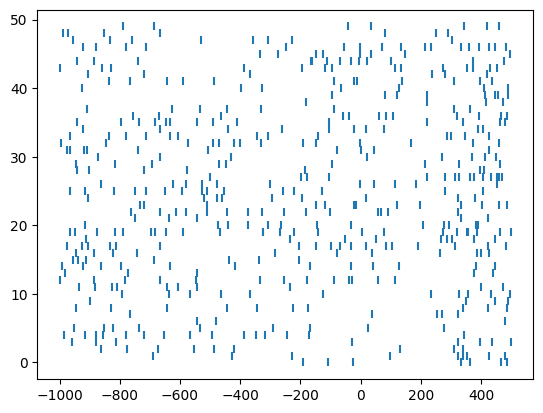

In [11]:
# Spikes
# Each row in sp_samples is one trial 
# All trials are aligned to 1000 ms before the start of the trial 
len_tr = neu.sp_samples[mask_b1].shape[1]
spikes = neu.sp_samples[mask_b1]
print(f'spikes {neu.sp_samples[mask_b1].shape}: \n{spikes[:ntr]}')
rows, cols = np.where(spikes[:50,:1500] >= 1)
_=plt.scatter(cols-1000,rows,marker="|",)

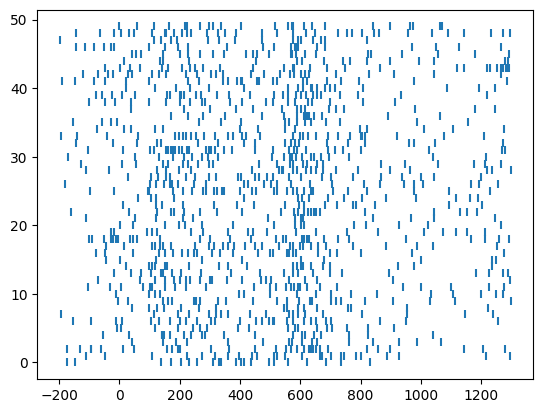

In [12]:
# Here we use the function align_on to select:
# correct, contralateral trials in block 1 and align all to each trial sample onset
time_before=200
align_sp, alig_mask = neu.align_on(select_block=1,event='sample_on',time_before=time_before,error_type=0,rf_stim_loc='contra')
rows, cols = np.where(align_sp[:50,:1500] >= 1)
_=plt.scatter(cols-time_before,rows,marker="|",)

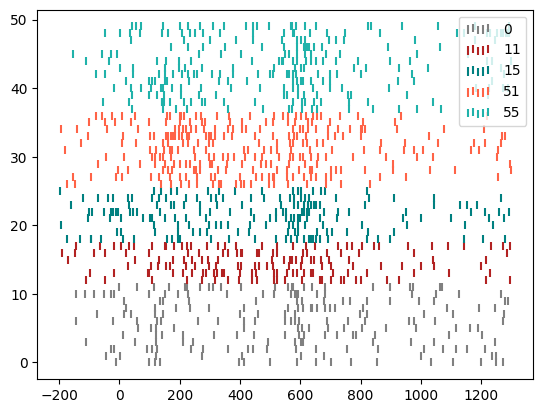

In [13]:
# Group and plot trials by sample id
samples = np.array(np.unique(neu.sample_id[mask_b1]),dtype=np.int8)
sp_by_sample = select_trials.get_sp_by_sample(align_sp[:50,:1500], neu.sample_id[alig_mask][:50], samples=samples)
n_tr=0
for key in sp_by_sample.keys():
    rows, cols = np.where(sp_by_sample[key] >= 1)
    _=plt.scatter(cols-time_before,rows+n_tr,marker="|",color=task_constants.PALETTE_B1[str(key)],label=key)
    n_tr+=len(sp_by_sample[key])
_=plt.legend(loc="upper right",scatterpoints=5)

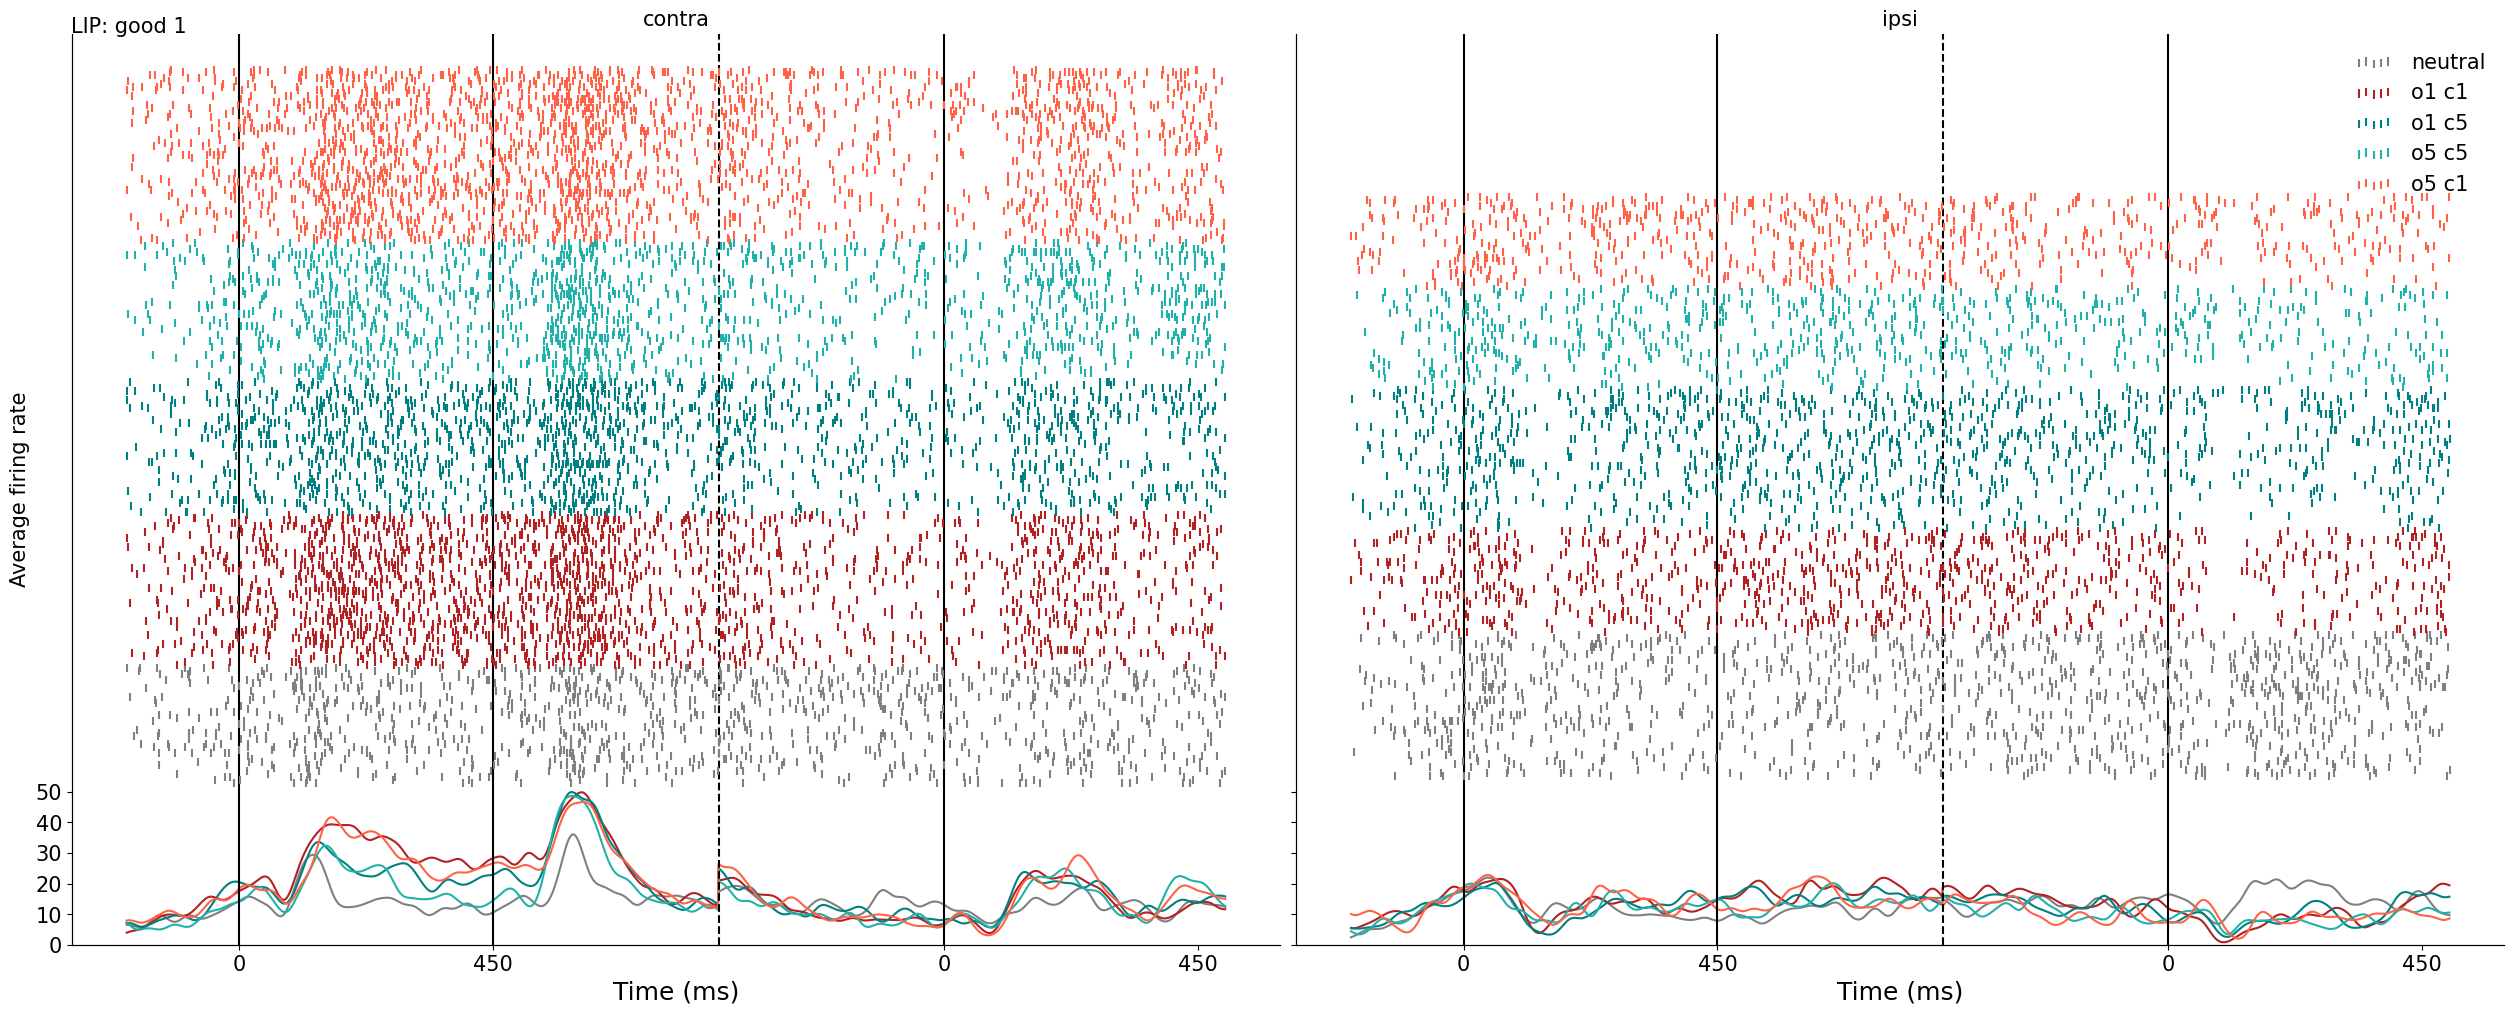

In [14]:
# Lets plot all trials
sp, conv = plot_raster.prepare_data_plotb1(neu,rf_stim_loc= ["contra", "ipsi"],cerotr=True,percentile=True)
fig=plot_raster.plot_sp_b1(neu,sp, conv)

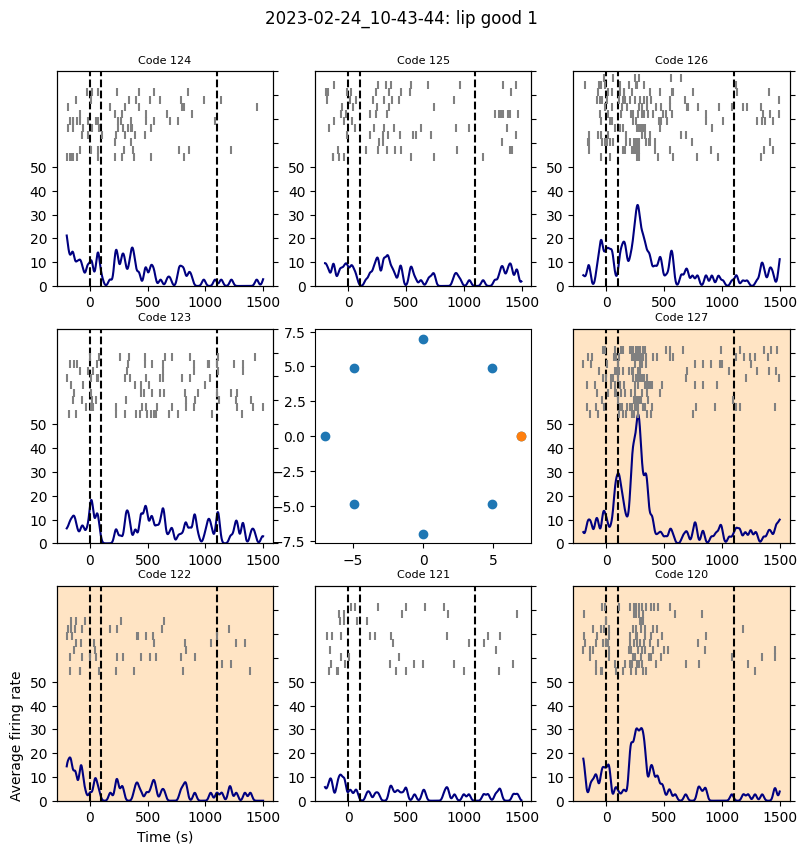

In [16]:
# Plot trials from the saccadic task (b2)
sp_pos, conv_pos, max_n_tr, conv_max = plot_raster.prepare_data_plotb2(neu)
fig = plot_raster.plot_sp_b2(neu,sp_pos, conv_pos, max_n_tr, conv_max, visual_rf=True,inout=1)